# Análise do Negócio
- O objetivo desse projeto é analisar todas os resultados e informações de uma empresa de estética automotiva.
- Empresa esta, de tamanho médio e presente no mercado a poucos meses.
- Os dados foram coletados a partir do sistema CRM.

- A quantidade de dados ainda é baixa, mas já é possível realizar análises poderosas e observar as suas tendências.
#### *A utilização de todos os dados relacionados à este relatório foram autorizadas previamente pelos responsáveis.

## Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from statistics import mean
from datetime import date

## Importando os Dados

In [2]:
dados = pd.read_csv("estetica_automotiva.csv", 
          sep = ",", 
          parse_dates = ["dtatendimento", "dtfechamento"], 
          dayfirst = False)

#Visulizando
dados.head()

,ID,nome,responsavel,origem,temperatura,situacao,dtatendimento,dtfechamento,categoria,restauracao,...,polimento,vitrificacao,lavagem_motor,tratamento_vidros,protecao_pintura,outros,lavagem_detalhada,lavagem_moto,desconto,total
0,345zYB2RStaeNDSoFPrKCQ,Tintin,Victor,Outros,Quente,FECHADO,2022-07-20 10:48:31,2022-07-20 14:46:05,Pequeno,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,10.0,90.0
1,kodJrgZQQbOYocrI4wEXug,Victor Luiz,Victor,Outros,Quente,FECHADO,2022-07-20 11:09:29,2022-07-29 14:47:14,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
2,9XlS0WWDTQ6xUnyp3EcXyg,Wesley,Victor,Indicação,Quente,FECHADO,2022-07-21 12:39:29,2022-07-21 13:50:40,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,40.0
3,a-ihIurH5Q9ipdAPzY3AeBw,Diogo,Victor,Outros,Quente,FECHADO,2022-07-21 13:50:48,2022-07-21 17:52:51,Pequeno,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,40.0
4,EnbNzP.8Qs-K3r-gQI3IOQ,Rubem Borges,Victor,Outros,Quente,FECHADO,2022-07-21 13:51:48,2022-07-21 17:52:59,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0


# Tratando Valores Nulos

In [30]:
dados.fillna(0, inplace = True)
dados.isnull().sum()

ID                  0
nome                0
responsavel         0
origem              0
temperatura         0
situacao            0
dtatendimento       0
dtfechamento        0
categoria           0
restauracao         0
higienizacao        0
lavagem             0
polimento           0
vitrificacao        0
lavagemmotor        0
tratamentovidros    0
protecaopintura     0
lavagemdetalhada    0
lavagemmoto         0
outros              0
descontos           0
total               0
dtype: int64

## Tamanho dos Dados

In [119]:
dados.shape
# Nº de Linhas e Colunas

(73, 22)

## Verificando os Tipos de Dados

In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 80 non-null     object        
 1   nome               80 non-null     object        
 2   responsavel        80 non-null     object        
 3   origem             80 non-null     object        
 4   temperatura        80 non-null     object        
 5   situacao           80 non-null     object        
 6   dtatendimento      80 non-null     datetime64[ns]
 7   dtfechamento       70 non-null     datetime64[ns]
 8   categoria          80 non-null     object        
 9   restauracao        4 non-null      float64       
 10  higienizacao       6 non-null      float64       
 11  lavagem            66 non-null     float64       
 12  polimento          3 non-null      float64       
 13  vitrificacao       0 non-null      float64       
 14  lavagem_moto

# Dados Categóricos

In [6]:
# Origem
origem = dados.groupby(['origem']).size()
origem

origem
Indicação     13
Instagram      2
Luminoso       5
Outros        35
Recorrente    18
dtype: int64

In [7]:
# Temperatura
temperatura = dados.groupby(['temperatura']).size()
temperatura

temperatura
Morno      5
Quente    68
dtype: int64

In [8]:
# Situação
situacao = dados.groupby(['situacao']).size()
situacao

situacao
EM ABERTO     8
FECHADO      65
dtype: int64

In [58]:
# Responsável
responsavel = dados.groupby(['responsavel']).size()
responsavel

responsavel
Gabriel    31
Victor     49
dtype: int64

# Key Perfomance Indicator (KPI's)

## Atendimentos por Mês
Quantos atendimentos são realizados por mês?

Text(0, 0.5, 'Total')

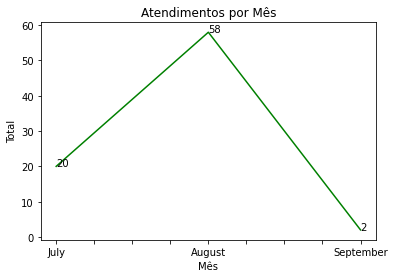

In [56]:
#Contando os atendimentos por mês
atendimento = dados.groupby((dados['dtatendimento']).dt.strftime('%B'), sort=False)['ID'].count()

#Função para adicionar os rótulos de valor
def labelatendimento(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'left')
        
x = atendimento
y = atendimento

#Gerando o gráfico e alterando as cores
grafico = atendimento.plot(color=['green'])

#Títulos e nome dos eixos
labelatendimento(x, y)
plt.title('Atendimentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total')

Após o primeiro mês de implantação do CRM, podemos observar que houve um aumento significativo na quantidade de atendimentos de Agosto em relação ao mês de Julho.

Podemos analisar ainda, que são realizados em média 2 atendimentos por dia, isso pode representar um cenário positivo ou negativo a partir da análise do gestor.

## Taxa de Conversão
Qual a taxa de conversão média?

In [49]:
#Calculando a taxa de conversão
taxa = ((dados.situacao == "FECHADO").sum()/dados.ID.count())

#Formatando e imprimindo o resultado
f'Taxa de Conversão: {taxa:.2%}'

'Taxa de Conversão: 86.25%'

Com esse número, podemos concluir que a cada 10 clientes que chegam até a loja, 9 fecham algum tipo de serviço.

## Taxa de Conversão Individual
E a taxa de conversão por colaborador?

Text(0, 0.5, 'Percentual')

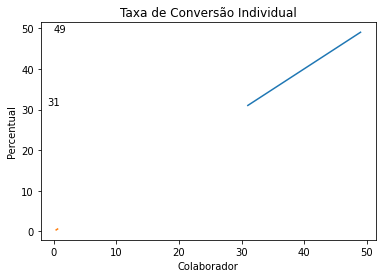

In [87]:
#Atendimentos por colaborador
individual = dados.groupby(['responsavel']).size()

#Calculando a taxa de conversão
taxa = (dados.situacao == "FECHADO").sum() and dados.groupby(['responsavel']).size()/dados.ID.count()

#Função para adicionar os rótulos de valor
def labelindividual(x1,y1):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x1 = individual
y1 = individual
x2 = taxa
y2 = taxa

#Gerando o gráfico e alterando as cores
grafico = plt.plot(x1, y1, x2, y2)

#Títulos e nome dos eixos
labelindividual(x1,y1)
plt.title('Taxa de Conversão Individual')
plt.xlabel('Colaborador')
plt.ylabel('Percentual')

O colaborador Victor consegue ter um melhor aproveitamento sobre seus atendimentos, no entanto é importante revisar as quantidades de atendimentos, pois a falta de cadastro influcia diretamente na taxa de conversão.

## Faturamento por Mês
Qual o faturamento bruto gerado por mês?

Text(0, 0.5, 'Total')

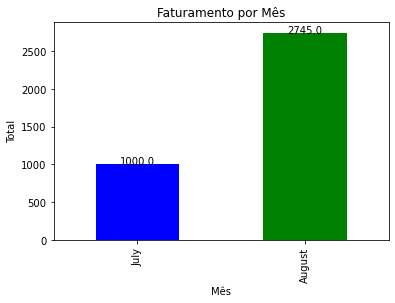

In [101]:
#Somando o faturamento por mês
faturamento = dados.groupby(dados['dtfechamento'].dt.strftime('%B'))['total'].sum().sort_values()

#Função para adicionar os rótulos de valor
def labelfaturamento(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = faturamento
y = faturamento

#Gerando o gráfico e alterando as cores
grafico = faturamento.plot.bar(color=['blue', 'green'])

#Títulos e nome dos eixos
labelfaturamento(x, y)
plt.title('Faturamento por Mês')
plt.xlabel('Mês')
plt.ylabel('Total')

## Faturamento por Serviço
Qual o faturamento total por serviço?

## Ticket Médio
Qual o ticket médio da loja?

In [74]:
#Calculando o ticket médio
ticket = ((dados.situacao == "FECHADO").sum() and (dados.total).sum()/(dados.situacao == "FECHADO").sum())

#Formatando e imprimindo o resultado
f'Ticket Médio de: R$ {ticket:,.2f}'

'Ticket Médio de: R$ 79.31'

## Tempo Médio para Venda
Quanto tempo em média a empresa leva para converter um lead desde o registro do atendimento? 

In [33]:
#Substraíndo a diferencia de dias entre a data do atendimento até o fechamento
difdate = dados.dtfechamento - dados.dtatendimento

#Extraíndo apenas os dias do resultado
days = difdate.dt.days

#Desconsiderando os valores NaN dos cálculos
days = days.mean(skipna=True)

f'{days:,.0f} dia(s) em média'

'1 dia(s) em média'

## Recorrência

In [43]:
#Extraíndo a recorrência
media = mean((dados.situacao == "FECHADO").sum() and dados.groupby(['nome']).size())

f'Retorno de: {media:,.2f}'

'Retorno de: 1.35'

## Lifetime Value (LTV)
Qual o lucro que cada cliente gera para empresa ao longo de sua vida?

LTV = Ticket médio das vendas X Número de compras do cliente ao longo do tempo

In [39]:
#Calculando o ticket médio
ticket = ((dados.situacao == "FECHADO").sum() and (dados.total).sum()/(dados.situacao == "FECHADO").sum())

#Extraíndo a recorrência
media = mean((dados.situacao == "FECHADO").sum() and dados.groupby(['nome']).size())

#Calculando o LTV
ltv = ticket * media

f'Média de: R$ {ltv:,.2f}'

'Média de: R$ 107.21'

## Temperatura dos Leads
Qual o nível de interesse dos Leads pelos serviços prestados?

*Legenda:*
- Frio: Pouco Interessado
- Morno: Interesse Médio
- Quente: Muito Interessado

Text(0, 0.5, 'Quantidade')

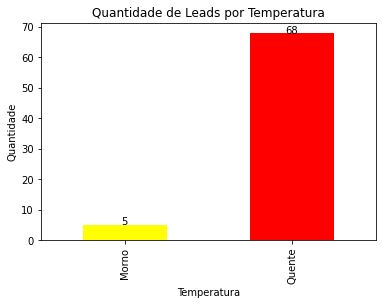

In [64]:
#Agrupando as temperaturas
temperatura = dados.groupby(['temperatura']).size()

#Ordenando os dados em ordem crescente
temperatura = temperatura.sort_values()

#Função para adicionar os rótulos de valor
def labeltemperatura(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = temperatura
y = temperatura

#Gerando o gráfico e alterando as cores
grafico = temperatura.plot.bar(color=['yellow', 'red'])

#Títulos e nome dos eixos
labeltemperatura(x, y)
plt.title('Quantidade de Leads por Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Quantidade')

A grande parte dos Leads foram classificados como "Quentes", justificando a ótima taxa de conversão.

## Origem dos Leads
Quais são os canais mais utilizados pelos Leads até chegarem a loja?

Text(0, 0.5, 'Quantidade')

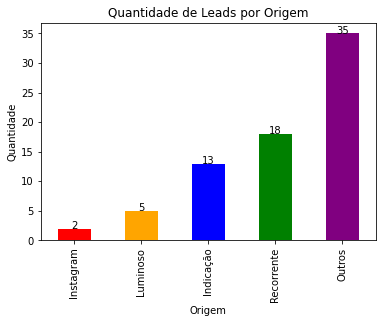

In [36]:
#Agrupando as origens
origem = dados.groupby(['origem']).size()

#Ordenando os dados em ordem crescente
origem = origem.sort_values()

#Função para adicionar rótulos de valor
def labelorigem(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = origem
y = origem

#Gerando o gráfico e alterando as cores
grafico = origem.plot.bar(color=['red', 'orange', 'blue', 'green', 'purple'])

#Títulos e nome dos eixos
labelorigem(x, y)
plt.title('Quantidade de Leads por Origem')
plt.xlabel('Origem')
plt.ylabel('Quantidade')

#### Resultado:

Devido a grande quantidade de Leads com a origem "Outros", podemos observar o seguinte:

- Existem um grande volume de Leads em possíveis canais não mapeados.
- E/Ou, essa informação não está sendo obtida como deveria no momento da atendimento.
    
Com a falta de clareza dessa informação, podemos concluir que os novos esforços deveriam ser direcionados à identificação desses canais e na realização de treinamentos à equipe de vendas para reforçar a importância da origem dos clientes na tomada de decisões.

## Conversão por Origem
Quais canais possuem uma maior taxa de conversão?

Text(0, 0.5, 'Taxa de Conversão')

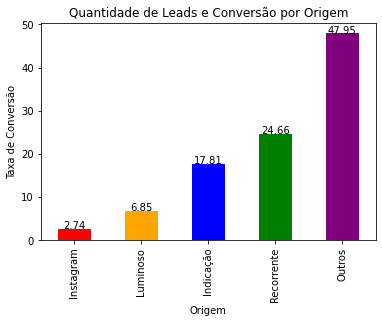

In [100]:
#Calculando a taxa de conversão por origem
taxa = ((dados.situacao == "FECHADO").sum() and dados.groupby(['origem']).size())/dados.ID.count()

#Ordenando os dados em ordem crescente
taxa = taxa.sort_values()

#Arredondando a taxa
taxa = round(taxa * 100, 2)

#Função para adicionar os rótulos de valor
def labeltaxa(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = taxa
y = taxa

#Gerando o gráfico e alterando as cores
grafico = taxa.plot.bar(color=['red', 'orange', 'blue', 'green', 'purple'])

#Títulos e nome dos eixos
labeltaxa(x,y)
plt.title('Quantidade de Leads e Conversão por Origem')
plt.xlabel('Origem')
plt.ylabel('Taxa de Conversão')

## Conclusão
O negócio anda bem, porém precisa de um acompanhamento mais incisivo do gestor para garantir que a cultura dos dados sejam enraízada, tornando a análise mais assertiva, itensificando o poder de decisão.